In [1]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence  # newly learnt this time!

#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef

#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm


plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1)  
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("Let's start!")

Let's start!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("Lung Cancer_Data.csv")
data.head(10)

,GD,AG,SK,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
from sklearn.preprocessing import LabelEncoder
data.loc[data["GD"] == "F","GD"] = 0
data.loc[data["GD"] == "M","GD"] = 1

#convert x axis data to int value
lb = LabelEncoder() 
data['GD'] = lb.fit_transform(data['GD'])

In [5]:
data.loc[data["LC"] == "NO","LC"] = 0
data.loc[data["LC"] == "YES","LC"] = 1

#convert x axis data to int value
lb = LabelEncoder() 
data['LC'] = lb.fit_transform(data['LC'])

In [6]:
#lets describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GD,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AG,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SK,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YF,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
AN,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PP,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CD,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FT,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
AL,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WH,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [7]:
data['LC'].value_counts()

LC
1    270
0     39
Name: count, dtype: int64

In [8]:
# #let's visualize this
# plt.figure(figsize=(10,5))
# sns.heatmap(data.isnull(),yticklabels= False)
# plt.title("Visualization of Missing Values")
# plt.show()

In [9]:
# data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
# plt.show()

In [10]:
data_boxcox = data.copy()
X = data_boxcox.drop(["LC"],axis=1)
Y = data_boxcox["LC"]

In [11]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.LC==0]
df_minority = data_bal[data_bal.LC==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=True,n_samples=267,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.LC.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=100,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.LC.value_counts())

Downsampled data:->
 LC
1    270
0    267
Name: count, dtype: int64
Upsampled data:->
 LC
1    100
0     39
Name: count, dtype: int64


In [12]:
#classes = ["0", "1","2","3","4","5","6"]
X = df_downsampled.drop(['LC'],axis=1)
Y = df_downsampled['LC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [13]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [14]:
display(df_downsampled.shape, df_downsampled.head())

(537, 16)

,GD,AG,SK,YF,AN,PP,CD,FT,AL,WH,AC,CF,SB,SD,CP,LC
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
245,1,59,1,1,1,2,1,2,1,2,1,1,2,1,2,0
277,0,87,1,1,1,1,2,2,1,1,1,1,2,1,1,0
286,0,63,1,1,1,1,2,2,1,1,1,1,2,1,1,0
129,0,63,1,1,1,1,2,2,1,1,1,1,2,1,1,0


In [15]:
df_info = DataFrameSummary(df_downsampled)
df_info.summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
GD,537.0,0.482309,0.500153,0.0,0.0,0.0,1.0,1.0,537,2,0,0%,bool
AG,537.0,61.962756,8.638604,21.0,58.0,62.0,68.0,87.0,537,39,0,0%,numeric
SK,537.0,1.541899,0.498706,1.0,1.0,2.0,2.0,2.0,537,2,0,0%,bool
YF,537.0,1.47486,0.499833,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool
AN,537.0,1.420857,0.494157,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool
PP,537.0,1.392924,0.488855,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool
CD,537.0,1.44879,0.497834,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool
FT,537.0,1.581006,0.493855,1.0,1.0,2.0,2.0,2.0,537,2,0,0%,bool
AL,537.0,1.385475,0.487161,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool
WH,537.0,1.404097,0.491174,1.0,1.0,1.0,2.0,2.0,537,2,0,0%,bool


In [16]:
# Or customize according to what you'd like to know.

df_info2 = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_unique'])

for i in range(0, len(df_downsampled.columns)):
    df_info2.loc[i] = [df_downsampled.columns[i],
                      df_downsampled[df_downsampled.columns[i]].isnull().sum(),
                      df_downsampled[df_downsampled.columns[i]].dtypes,
                      df_downsampled[df_downsampled.columns[i]].nunique()]
    
df_info2

,Name of Col,Num of Null,Dtype,N_unique
0,GD,0,int32,2
1,AG,0,int64,39
2,SK,0,int64,2
3,YF,0,int64,2
4,AN,0,int64,2
5,PP,0,int64,2
6,CD,0,int64,2
7,FT,0,int64,2
8,AL,0,int64,2
9,WH,0,int64,2


In [17]:
dtype = pd.DataFrame(df_info.summary().loc['types'] == 'numeric')
num_cols = dtype[dtype['types'] == True].index.to_list()
num_cols

['AG']

In [18]:
cat_cols = list(set(df_downsampled.columns) - set(num_cols))
cat_cols.remove('LC')

cat_cols

['CP',
 'WH',
 'SB',
 'FT',
 'SD',
 'CF',
 'YF',
 'PP',
 'AN',
 'SK',
 'CD',
 'GD',
 'AC',
 'AL']

In [19]:
#!pip install scipy==1.11.4 --user

In [20]:
import pycaret
from pycaret.classification import *

In [21]:
setup(data = df_downsampled, 
      target = 'LC',
      session_id = 42,
      preprocess = True,
      index=False,
      numeric_features = cat_cols
     )
#       silent = True

,Description,Value
0,Session id,42
1,Target,LC
2,Target type,Binary
3,Original data shape,"(2387, 16)"
4,Transformed data shape,"(2387, 16)"
5,Transformed train set shape,"(1670, 16)"
6,Transformed test set shape,"(717, 16)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


## 1. Stacking using Best Base Models

In [23]:
stacking_bbm= stack_models(estimator_list = [nb, ridge, lda, gbc, ada], meta_model = lr())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9880,0.9733,0.8947,1.0000,0.9444,0.9378,0.9396
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9820,0.9748,0.8421,1.0000,0.9143,0.9043,0.9085
4,0.9940,0.9634,0.9474,1.0000,0.9730,0.9696,0.9701
5,0.9940,0.9996,0.9474,1.0000,0.9730,0.9696,0.9701
6,0.9880,0.9947,0.8947,1.0000,0.9444,0.9378,0.9396
7,0.9880,0.9659,0.8947,1.0000,0.9444,0.9378,0.9396
8,0.9940,0.9513,0.9474,1.0000,0.9730,0.9696,0.9701


In [24]:
evaluate_model(stacking_bbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
# # !pip install shapely
# !pip install shap

In [26]:
import shap
shap.initjs()

In [27]:
explainer=shap.Explainer(stacking_bbm)
shap_values=explainer(X_test)

In [28]:
np.shape(shap_values.values)

(162, 15)

#### 1. Waterfall Plot

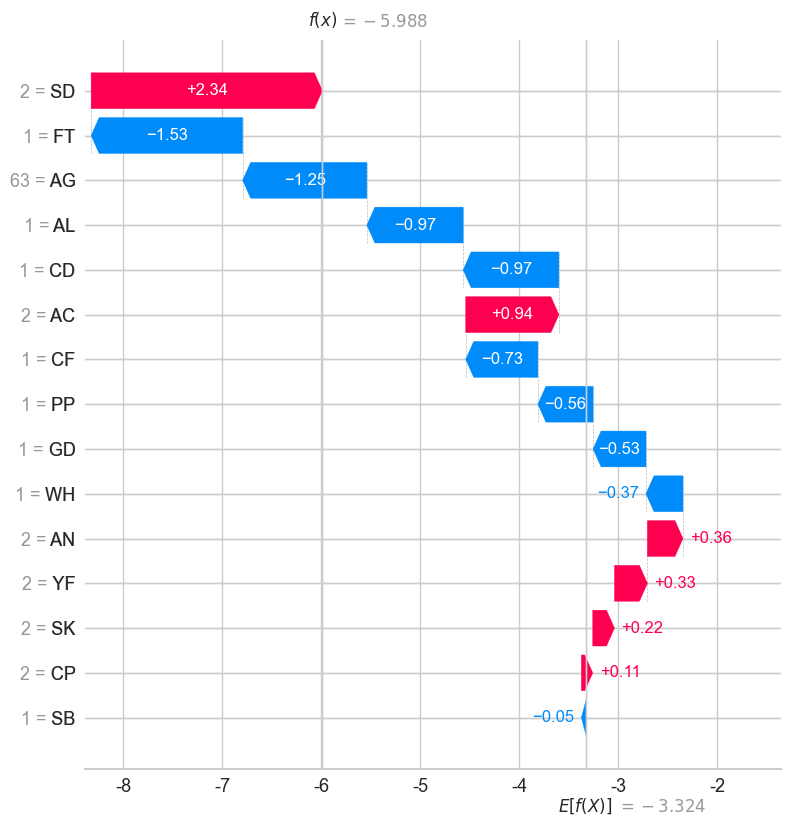

In [29]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

#### 2. Force Plot 

In [30]:
shap.plots.force(shap_values[0])

In [31]:
shap.plots.force(shap_values[0:100])

#### 3. Absolute Mean Shap 

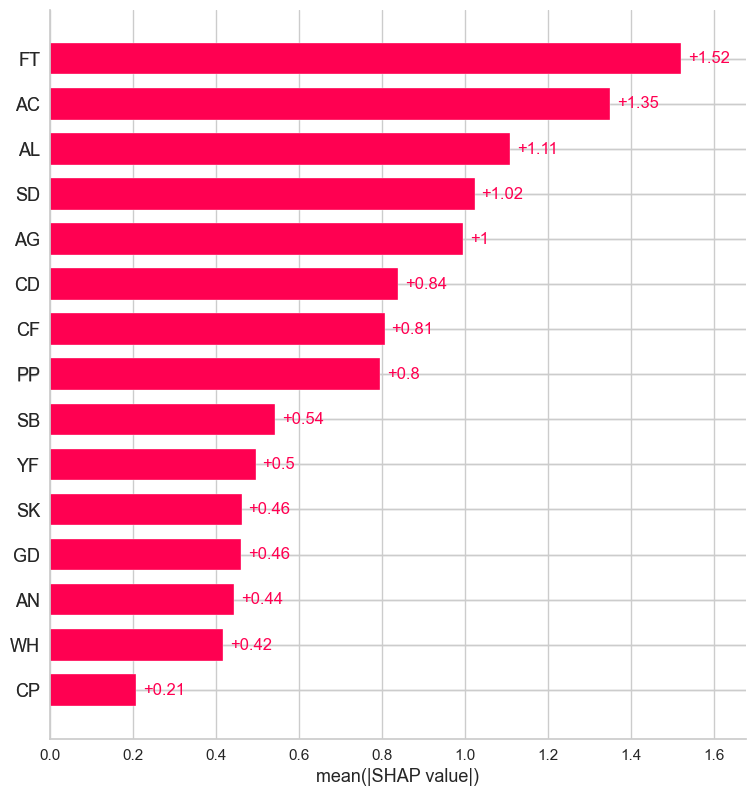

In [32]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

#### 4. Beeswarm Plot 

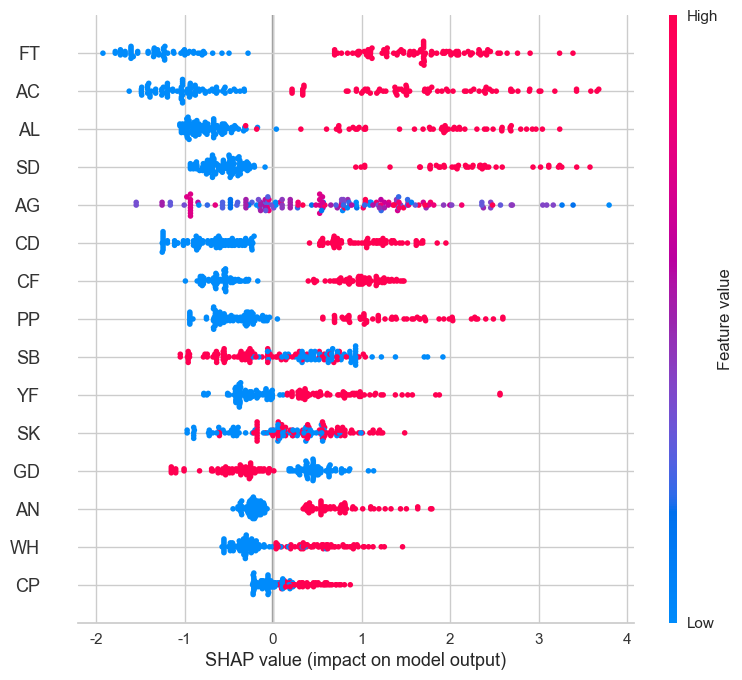

In [33]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

#### 5. Dependence Plots

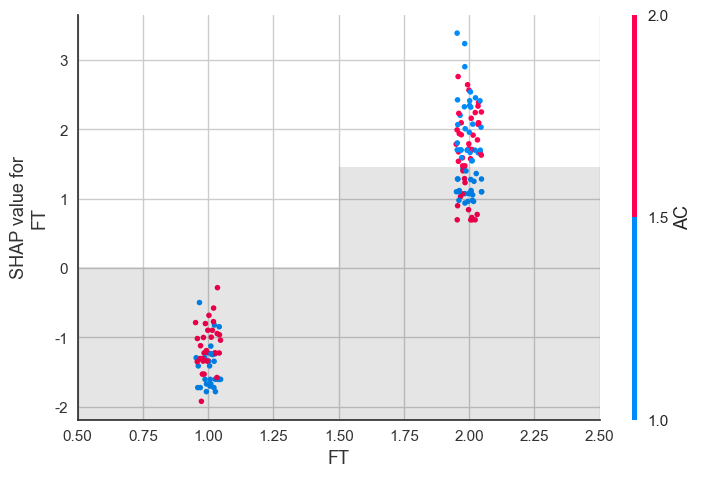

In [34]:
shap.plots.scatter(shap_values[:, "FT"],
                   color=shap_values[:, "AC"])

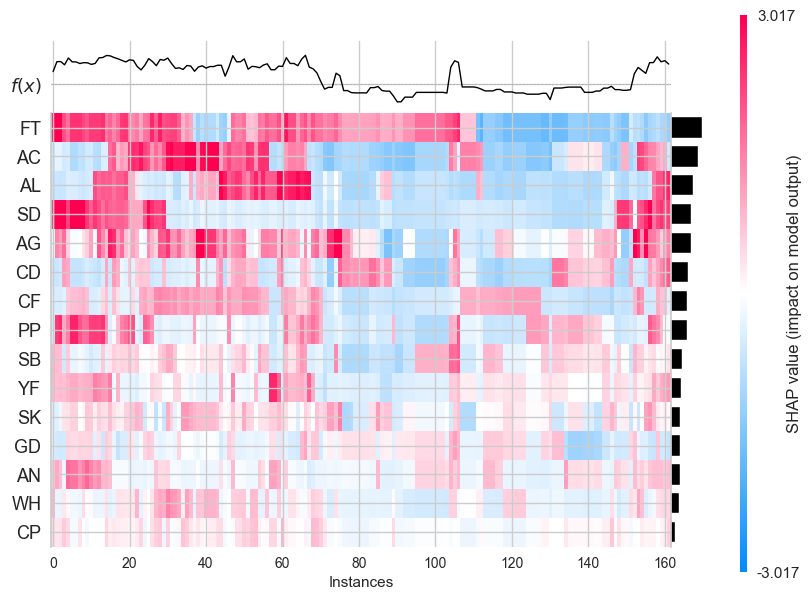

<Axes: xlabel='Instances'>

In [35]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

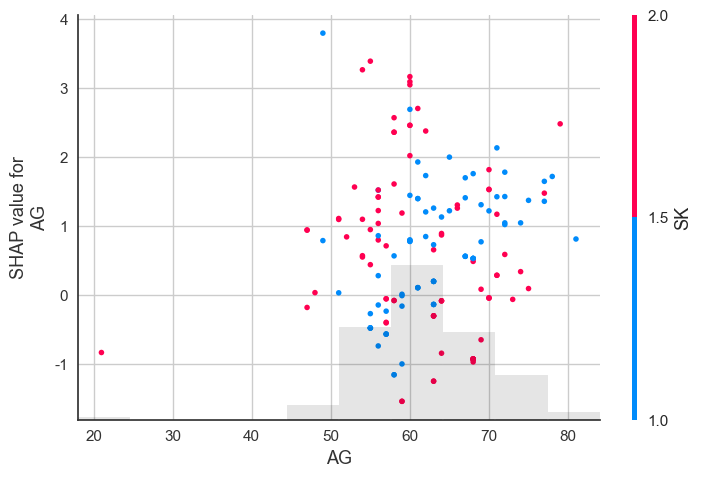

In [36]:
shap.plots.scatter(shap_values[:, "AG"], color=shap_values)

## 2. Stacking using Random Base Models

In [37]:
stacking_rbm= stack_models(estimator_list = [knn, dt, et, gbc, ada], meta_model = svm())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9880,0.9829,0.8947,1.0000,0.9444,0.9378,0.9396
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9820,0.9911,0.8421,1.0000,0.9143,0.9043,0.9085
4,0.9940,0.9851,0.9474,1.0000,0.9730,0.9696,0.9701
5,0.9940,1.0000,0.9474,1.0000,0.9730,0.9696,0.9701
6,0.9880,1.0000,0.8947,1.0000,0.9444,0.9378,0.9396
7,0.9880,0.9996,0.8947,1.0000,0.9444,0.9378,0.9396
8,0.9880,0.9964,0.8947,1.0000,0.9444,0.9378,0.9396


In [38]:
evaluate_model(stacking_rbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
explainer=shap.Explainer(stacking_rbm)
shap_values=explainer(X_test)

In [40]:
np.shape(shap_values.values)

(162, 15)

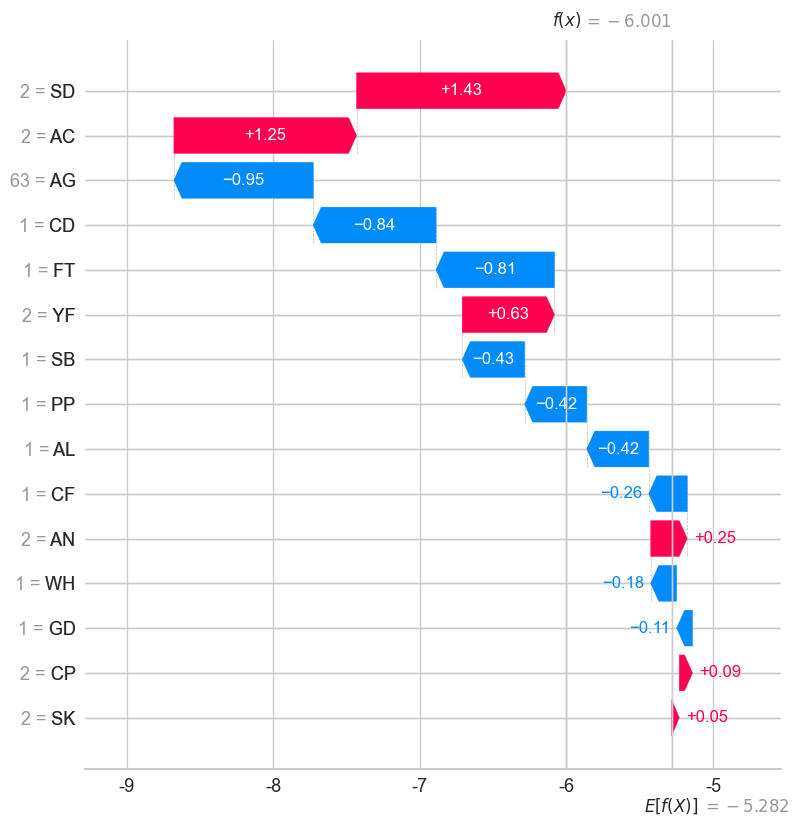

In [41]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [42]:
shap.plots.force(shap_values[0])

In [43]:
shap.plots.force(shap_values[0:100])

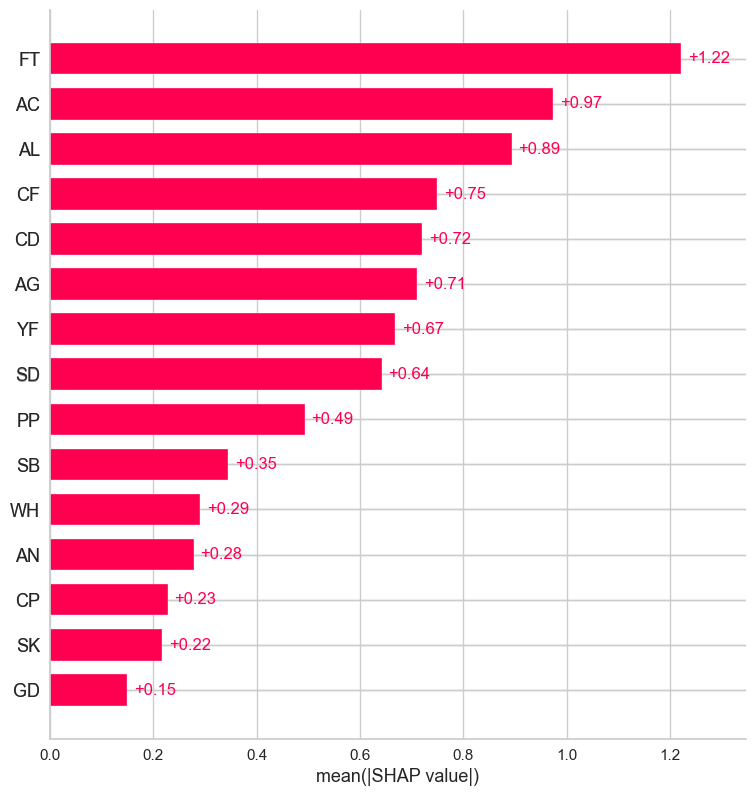

In [44]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

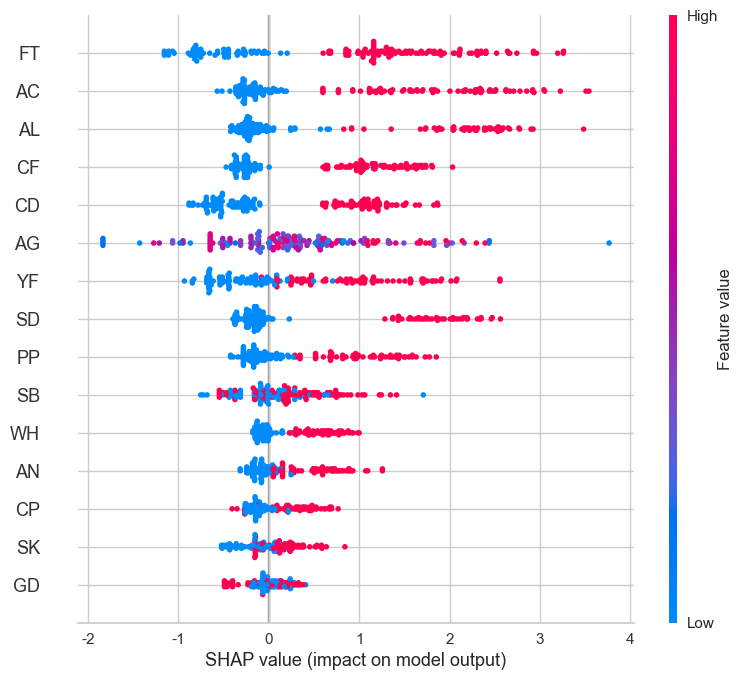

In [45]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

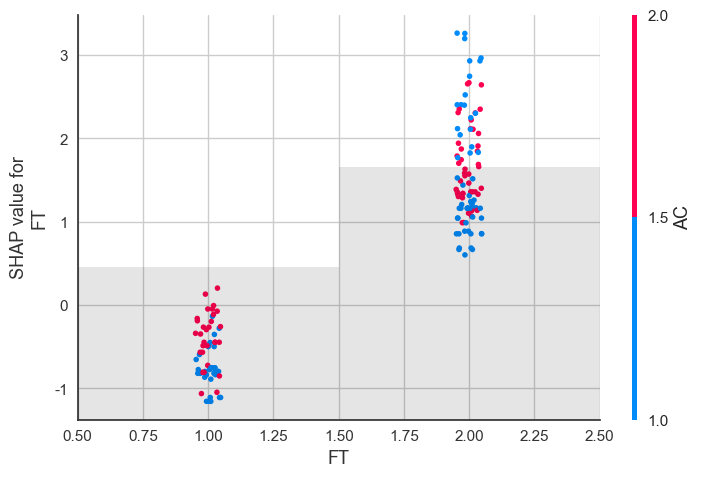

In [46]:
shap.plots.scatter(shap_values[:, "FT"],
                   color=shap_values[:, "AC"])

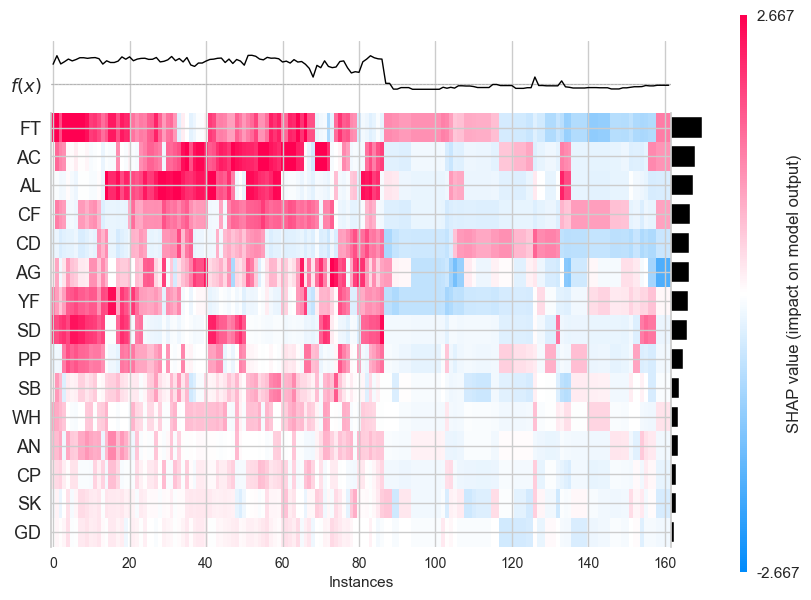

<Axes: xlabel='Instances'>

In [47]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

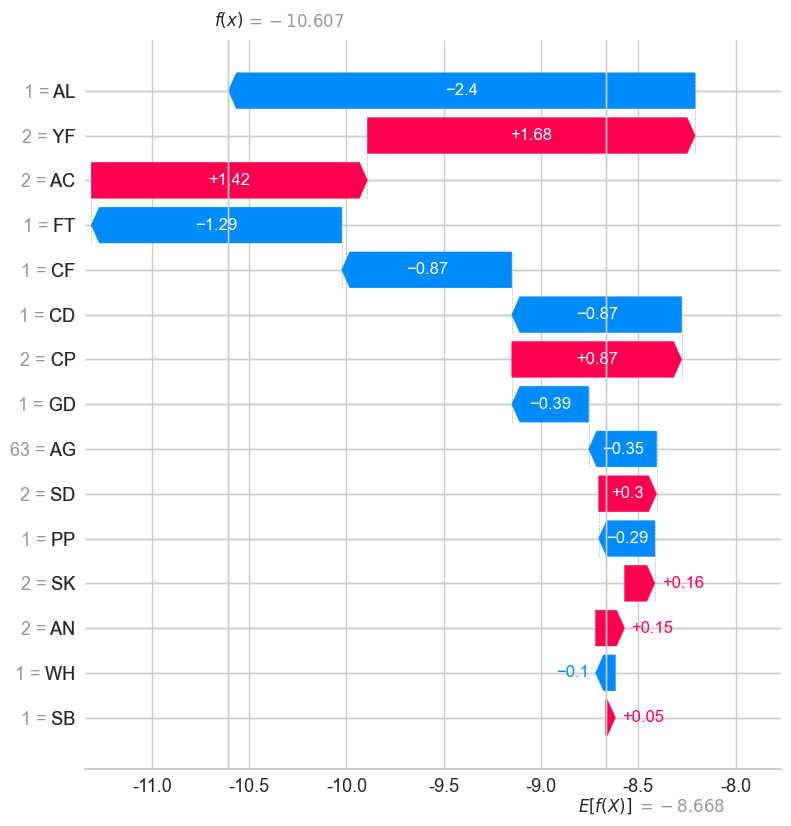

In [52]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [53]:
shap.plots.force(shap_values[0])

In [54]:
shap.plots.force(shap_values[0:100])

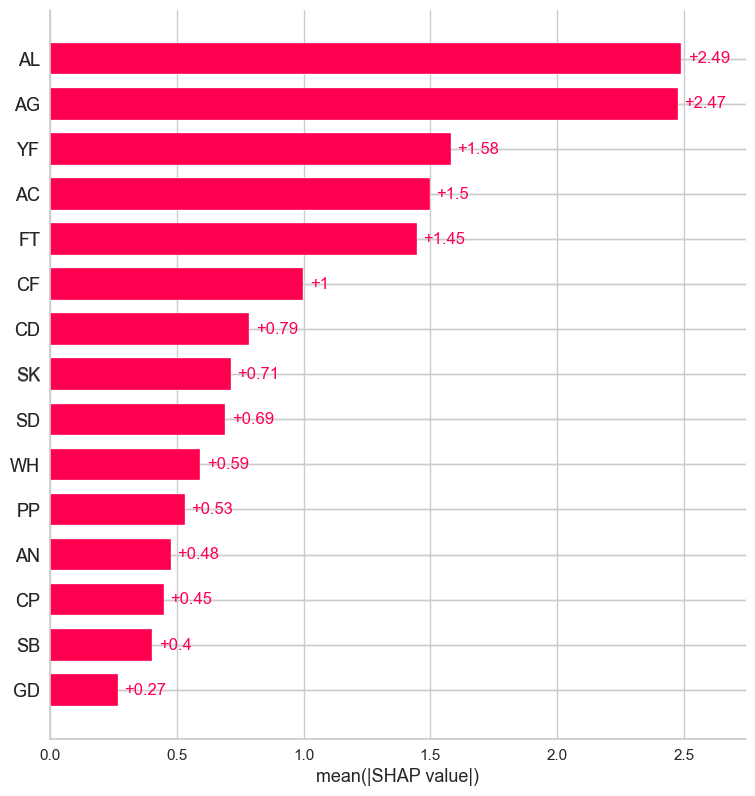

In [55]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

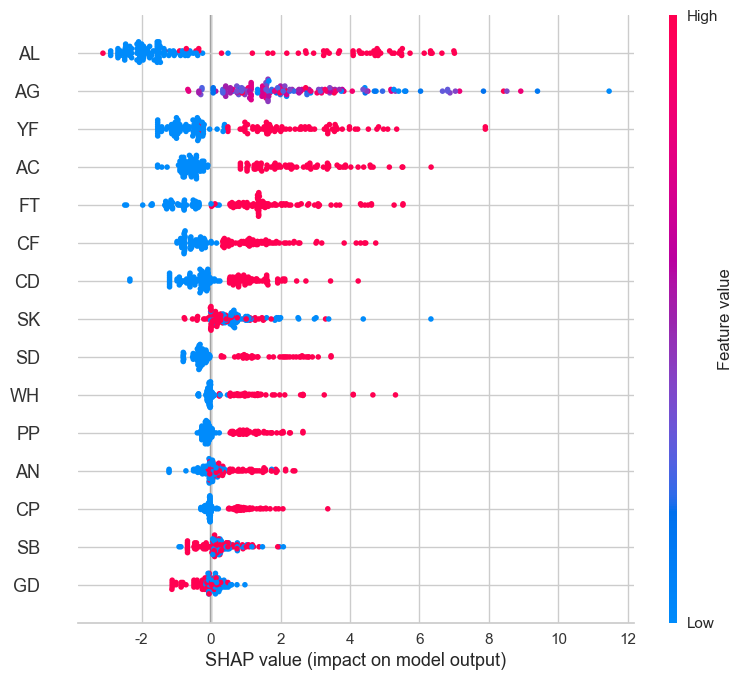

In [56]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

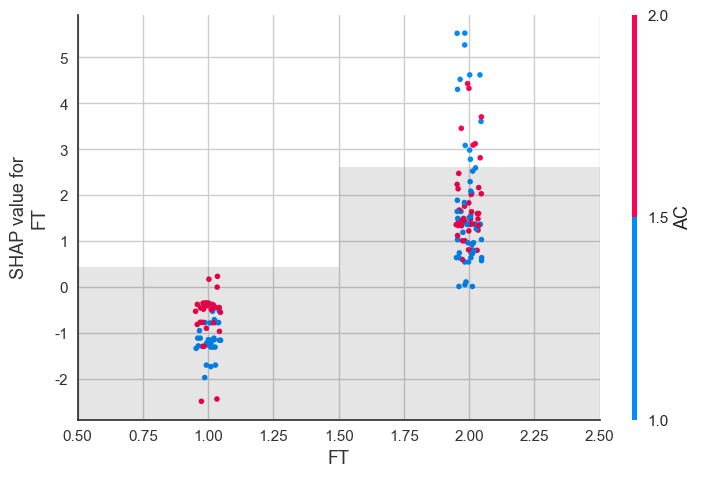

In [57]:
shap.plots.scatter(shap_values[:, "FT"],
                   color=shap_values[:, "AC"])

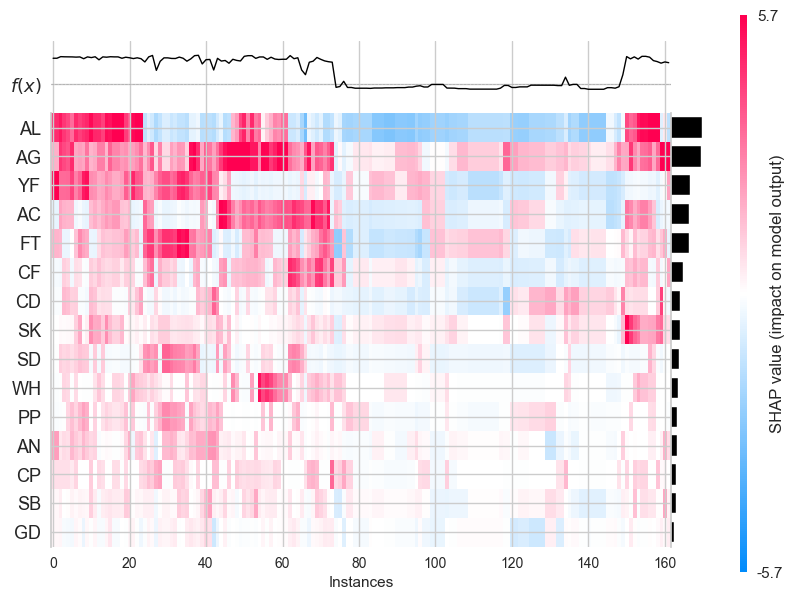

<Axes: xlabel='Instances'>

In [58]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

## End of The Experiment